In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
import math 

In [104]:
data = pd.read_csv('../DATA/data.csv')
data['date'] = pd.to_datetime(data['date'])
# data['date'] = data['date'].apply(lambda x:x.toordinal())

temp = data[['date', 'mean_temp']]
temp.index = temp['date']
temp = temp.drop('date',axis=1)

train = temp.iloc[:-365]
test = temp.iloc[-365:]
test.head()

,mean_temp
date,
2023-02-26,43.0
2023-02-27,45.7
2023-02-28,50.7
2023-03-01,49.3
2023-03-02,56.7


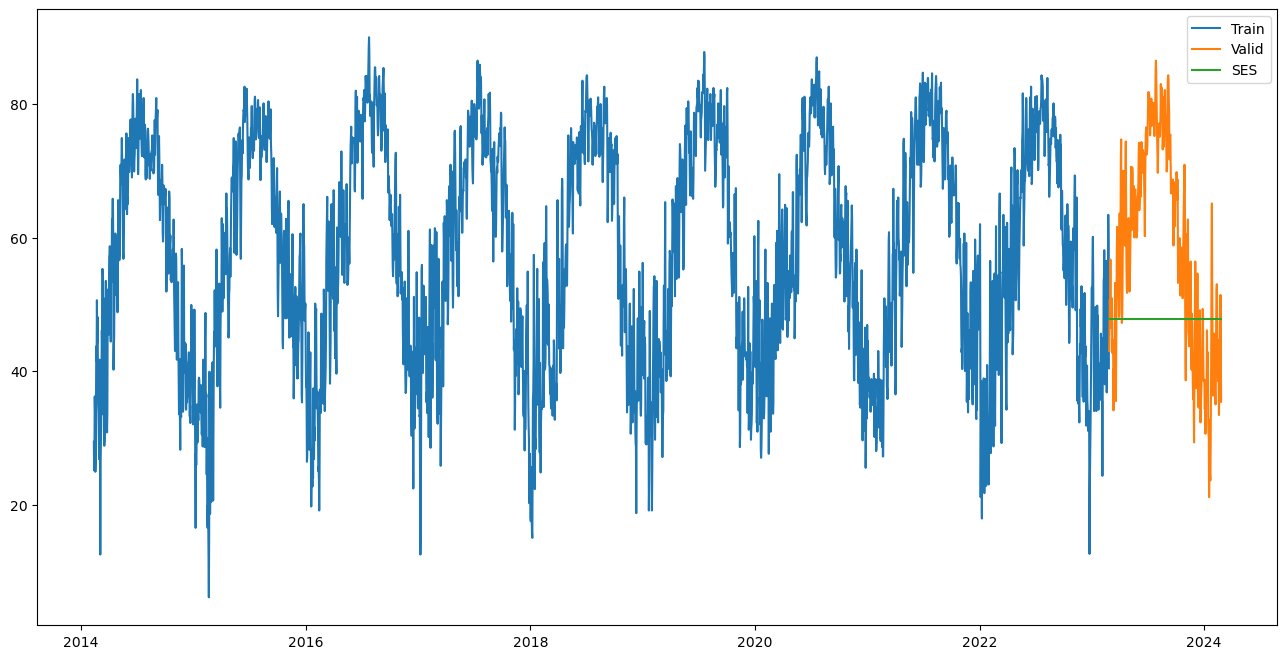

18.588996628257206


In [120]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = test.copy() 
fit2 = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=0.6,
        optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))  
plt.plot(train, label='Train') 
plt.plot(test, label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()
rms = (mean_squared_error(test, y_hat_avg.SES))**.5
print(rms)